In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset1 = pd.read_csv('DEEP.csv')
X = dataset1[['INPUT']].values
y = dataset1[['OUTPUT']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(1, 8)
    self.fc2 = nn.Linear(8, 10)
    self.fc3 = nn.Linear(10, 1)
    self.relu = nn.ReLU()
    self.history = {'loss':[]}

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [ ]:
ai_brain = NeuralNet()
print(list(ai_brain.parameters()))
criterion = nn.MSELoss()
optimizer = optim.RMSprop(ai_brain.parameters(), lr=0.001)

[Parameter containing:
tensor([[ 0.8175],
        [ 0.8879],
        [-0.0218],
        [ 0.1119],
        [ 0.4093],
        [-0.9845],
        [ 0.6153],
        [-0.5583]], requires_grad=True), Parameter containing:
tensor([-0.1509,  0.8424, -0.4047, -0.8154, -0.4957,  0.7299,  0.9459, -0.2390],
       requires_grad=True), Parameter containing:
tensor([[-0.2640, -0.2890,  0.3170,  0.3400, -0.0825,  0.0292, -0.1664,  0.1449],
        [ 0.2578, -0.2860, -0.2241,  0.0102,  0.2807,  0.0691,  0.2159, -0.0762],
        [-0.0493, -0.3129,  0.2554,  0.2529, -0.1152,  0.1849, -0.1287, -0.0276],
        [-0.3156, -0.0733,  0.2732, -0.1510, -0.1098, -0.2338,  0.1270, -0.0197],
        [ 0.2106,  0.0368, -0.0693, -0.0328, -0.0336,  0.2634, -0.1511,  0.1680],
        [ 0.0035,  0.3297, -0.1051, -0.0814,  0.1405,  0.2828, -0.0144, -0.2576],
        [ 0.2224,  0.2763, -0.3409,  0.3506,  0.1365,  0.0389, -0.2709, -0.0455],
        [-0.0204,  0.0076,  0.0579,  0.3302, -0.0122,  0.0938, -0.2574, -0.0

In [ ]:
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    for epoch in range(epochs):
        optimizer.zero_grad()  # Clear previous gradients
        loss = criterion(ai_brain(X_train), y_train)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        # Store loss for visualization
        ai_brain.history['loss'].append(loss.item())

        # Print loss every 200 epochs
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')

In [ ]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch [0/2000], Loss: 18.067419
Epoch [200/2000], Loss: 0.180180
Epoch [400/2000], Loss: 0.113935
Epoch [600/2000], Loss: 0.032853
Epoch [800/2000], Loss: 0.000998
Epoch [1000/2000], Loss: 0.000000
Epoch [1200/2000], Loss: 0.000002
Epoch [1400/2000], Loss: 0.000138
Epoch [1600/2000], Loss: 0.000183
Epoch [1800/2000], Loss: 0.000251


In [ ]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 6173.794434


In [ ]:
loss_df = pd.DataFrame(ai_brain.history)

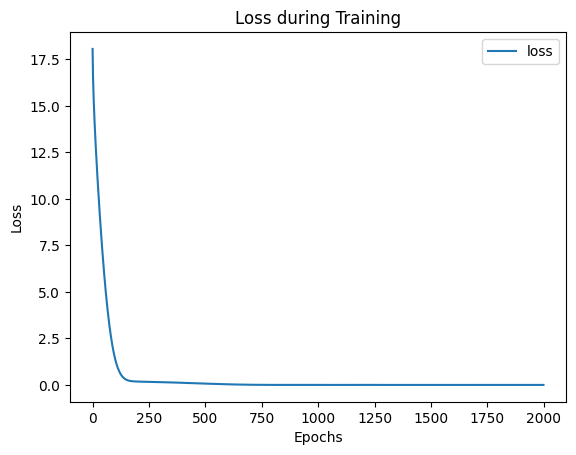

In [ ]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [ ]:
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')


Prediction: 2.008521318435669
